# Project Notebook


## Before you start:
* **Make your own copy** of this notebook
  * Select 'File' --> 'Save a copy in Drive...'
  * Add your name in front of the title of the notebook by clicking on the file name above.  

---
---
#  Correlations/Scatterplots/Regressions Project - NBA Basketball Statistics and Salaries 2022-2023

---
---

***
## Authorship and Resources Used
* Launi Chanthaboury
* [Chat GPT](https://chat.openai.com/) - Specifically used for creating correlation coefficient numbers and "from scipy.stats import pearsonr" and creating new tick marks.

***
## Data Description and Source
* I selected a dataset that is comprised of player per-game stats, advanced statistics, and salaries for the 2022-2023 season. It includes a variety of different stats, but there were only a few that I decided to looks at. https://www.kaggle.com/datasets/jamiewelsh2/nba-player-salaries-2022-23-season
* This data came from Kaggle and the user, Jamie Welsch, got the data from HoopsHype, a media outlet dedicated to NBA salaries, news, and all things NBA.

***
## Research Question
* Does player performance and age impact salary of NBA players?
I wanted to research just how a player's performance impacted their salary. One would assume that there would be a very linear correlation between scoring effectively, scoring a lot, and making a lot of money. I knew that the answer was not going to be as black and white as I predicted, so I knew this was going to be a good research question.

***
## Import Libraries and Set Preferences for Visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# add any additional libraries or plot preferences to this block

***
## Read and Verify Data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# enter and test your code here
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/ScatterPlot/nba_salaries.csv')

df = df.dropna()

df = df.sort_values(by='Salary', ascending = False)
df = df[df['Salary'] > 999999]
df['Position'] = df['Position'].replace('SF-PF', 'SF')
df['Position'] = df['Position'].replace('PG-SG', 'PG')
df['Position'] = df['Position'].replace('SG-PG', 'SF')
df['Position'] = df['Position'].replace('SF-SG', 'SF')
df

,Unnamed: 0,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,...,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,curryst01
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,...,0.4,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4,walljo01
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,...,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9,westbru01
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,...,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9,jamesle01
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,...,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1,duranke01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,387,Max Christie,1017781,SG,19,LAL,41,3,12.5,1.1,...,0.2,1.7,1.8,0.5,0.2,0.2,0.3,0.8,3.1,chrisma02
388,388,Josh Minott,1017781,SF,20,MIN,15,0,6.4,1.2,...,0.3,1.3,1.7,0.3,0.3,0.4,0.2,0.7,3.1,minotjo01
389,389,Jabari Walker,1017781,SF,20,POR,56,0,11.1,1.5,...,0.9,1.5,2.3,0.6,0.2,0.2,0.5,1.2,3.9,walkeja01
390,390,Eugene Omoruyi,1013119,SF,25,DET/OKC,40,6,16.1,2.5,...,1.1,1.7,2.8,0.7,0.7,0.1,0.9,2.3,7.0,omorueu01


***
## Analyses and Visualizations
I created a bar plot to show the average salary based on position. I also adjusted the ticks to make it easier to read. It was orginally written in scientific notation. (1e7) I wanted to get an understanding of the salaries as a whole. Some players are listed as two position, but in order to have just the five basic positions, I had the player become categorized as their main position.


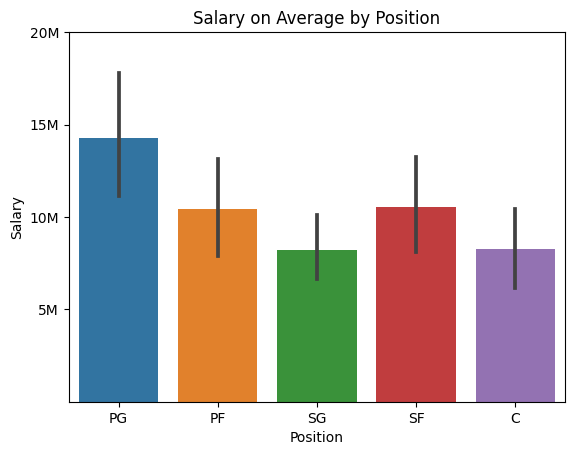

In [ ]:
sns.barplot(x = 'Position', y = 'Salary', data = df)

custom_ticks = [5000000, 10000000, 15000000, 20000000]
custom_labels = ['5M', '10M', '15M', '20M']

plt.yticks(ticks=custom_ticks, labels=custom_labels)
plt.xlabel('Position')
plt.ylabel('Salary')
plt.title('Salary on Average by Position')
plt.show()


My first graph is a scatterplot that shows the relation between salary and field goal percentage. My initial thought was that if you have a high field goal percentage, you would get paid more. To my surprise, there was only a 0.11 correlation coefficient. (Weak Positive) I used the pearson r to measure the strength (or lackthereof) between two variables.

Correlation coefficient: 0.11669039262906439
P-value: 0.022906067152500965


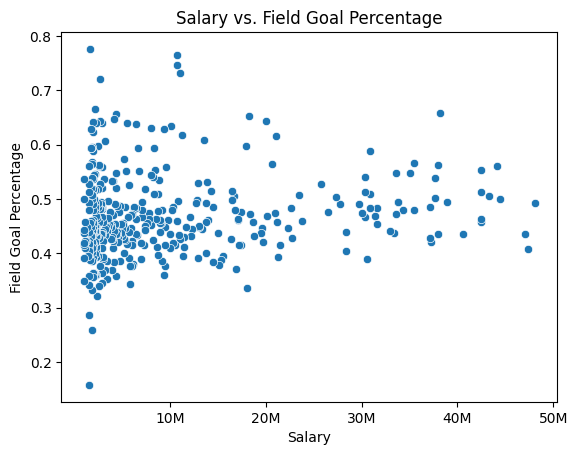

In [ ]:
# enter and test your code here
sns.scatterplot(x = 'Salary', y = 'FG%', data = df)
correlation_coefficient, p_value = pearsonr(df['Salary'], df['FG%'])

print(f"Correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

custom_ticks = [10000000, 20000000, 30000000, 40000000, 50000000]
custom_labels = ['10M', '20M', '30M', '40M', '50M']

plt.xticks(ticks=custom_ticks, labels=custom_labels)

plt.xlabel('Salary')
plt.ylabel('Field Goal Percentage')
plt.title('Salary vs. Field Goal Percentage')
plt.show()

This is a graph showing the correlation between salary and a player's 3 point percentage. This is another shooting statistic that shows how well a player can shoot a 3 pointer. I did not think that there would be a strong correlation because not all players have to shoot the 3 pointer well in order to be a good player. There are many other ways to score, but it is a key statistic when tracking a player's performance. Here we see weak positive correlation.

Correlation coefficient: 0.04086700188260545
P-value: 0.42699059340386225


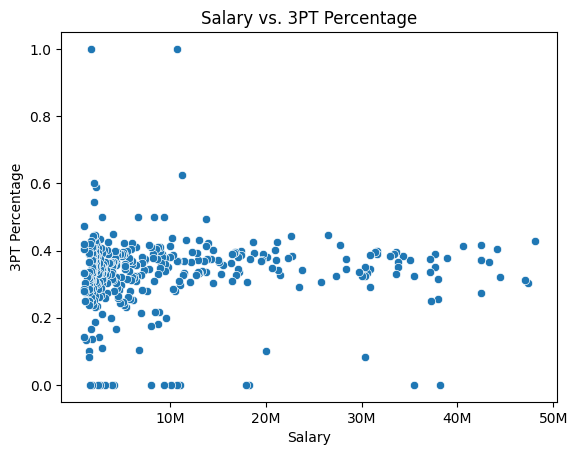

In [ ]:
# enter and test your code here
sns.scatterplot(x = 'Salary', y = '3P%', data = df)
correlation_coefficient, p_value = pearsonr(df['Salary'], df['3P%'])

print(f"Correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

custom_ticks = [10000000, 20000000, 30000000, 40000000, 50000000]
custom_labels = ['10M', '20M', '30M', '40M', '50M']

plt.xticks(ticks=custom_ticks, labels=custom_labels)

plt.xlabel('Salary')
plt.ylabel('3PT Percentage')
plt.title('Salary vs. 3PT Percentage')
plt.show()

This graph shows the correlation between salary and age. It is assumed that the older a player is, the more experience they typically will have. With more experience, one may assume that the salary would increase. This is true for many jobs not just professional sport jobs. We can see a moderate positive correlation between the two variables.

Correlation coefficient: 0.40154182375760045
P-value: 3.7269664462601907e-16


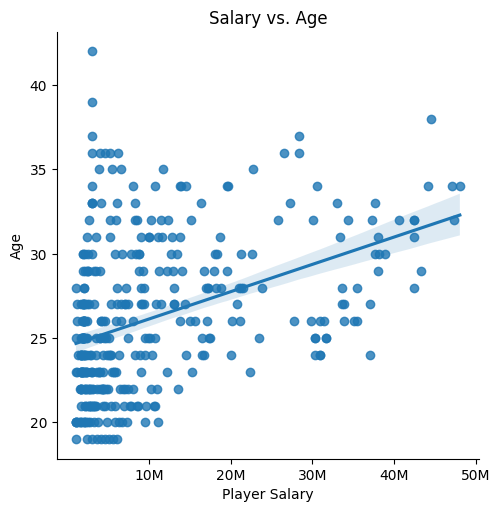

In [ ]:
sns.lmplot(x = 'Salary', y = 'Age', data = df)
correlation_coefficient, p_value = pearsonr(df['Salary'], df['Age'])

print(f"Correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

custom_ticks = [10000000, 20000000, 30000000, 40000000, 50000000]
custom_labels = ['10M', '20M', '30M', '40M', '50M']

plt.xticks(ticks=custom_ticks, labels=custom_labels)
plt.xlabel('Player Salary')
plt.ylabel('Age')
plt.title('Salary vs. Age')
plt.show()

This graph shows the correlation between free throw percentage and salary. Free throws are important and crucial statistics when it comes to a player's scoring. A coach should value free throws because they are "free' and unguarded shots that a player attempts. Because these types of shots are valued at such a high level, I thought it would be interesting to see if this has an impact on how much money a player makes. To my surprise once again, there is a weak positive association.

Correlation coefficient: 0.18761681322109539
P-value: 0.00023508070423365837


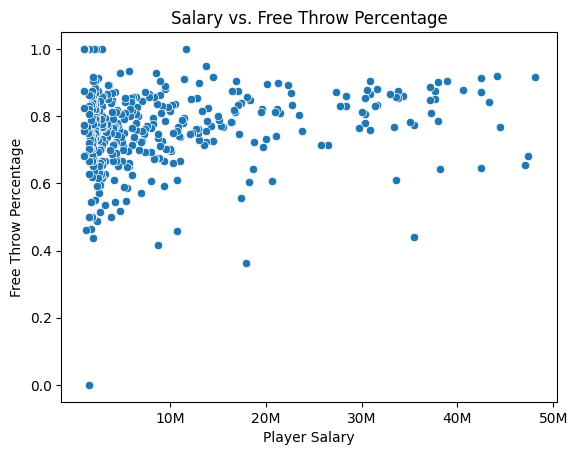

In [ ]:
sns.scatterplot(x = 'Salary', y = 'FT%', data = df)
correlation_coefficient, p_value = pearsonr(df['Salary'], df['FT%'])

print(f"Correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

custom_ticks = [10000000, 20000000, 30000000, 40000000, 50000000]
custom_labels = ['10M', '20M', '30M', '40M', '50M']

plt.xticks(ticks=custom_ticks, labels=custom_labels)
plt.xlabel('Player Salary')
plt.ylabel('Free Throw Percentage')
plt.title('Salary vs. Free Throw Percentage')
plt.show()


This graph shows the correlation between salary and minutes played per game. We can see a moderate strong association between these two variables. This followed my initial thoughts because the players that play the most should be the best players, resulting in higher wages.

Correlation coefficient: 0.6296858455752756
P-value: 2.288154653205926e-43


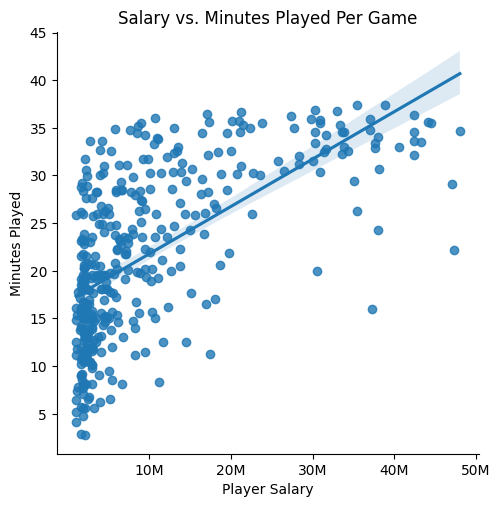

In [ ]:
sns.lmplot(x = 'Salary', y = 'MP', data = df)
correlation_coefficient, p_value = pearsonr(df['Salary'], df['MP'])

print(f"Correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

custom_ticks = [10000000, 20000000, 30000000, 40000000, 50000000]
custom_labels = ['10M', '20M', '30M', '40M', '50M']

plt.xticks(ticks=custom_ticks, labels=custom_labels)

plt.xlabel('Player Salary')
plt.ylabel('Minutes Played')
plt.title('Salary vs. Minutes Played Per Game')
plt.show()

Overall, this heatmap shows that the higher points you average per season, the higher your salary will be based on those ranges. It also shows that there is virtually no one who averages between 30-45 points that makes the least amount of money, according to the ranges.

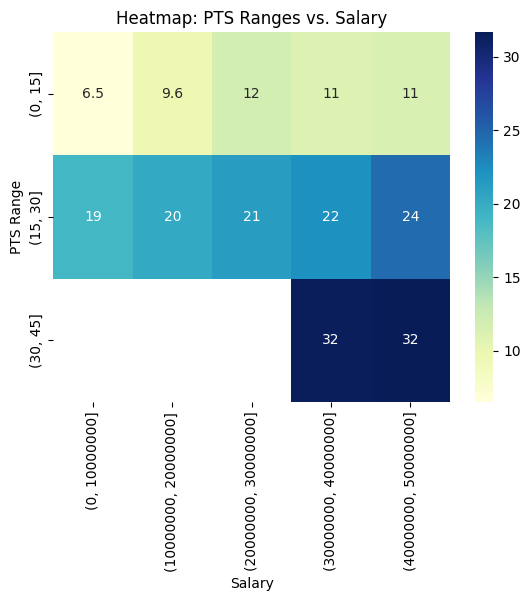

In [ ]:
ppg_bins = [0, 15, 30, 45, 60]
salary_bins = [0, 10000000, 20000000, 30000000, 40000000, 50000000]


df['PPG Range'] = pd.cut(df['PTS'], bins=ppg_bins)
df['Salary Range'] = pd.cut(df['Salary'], bins=salary_bins)


heatmap_data = df.pivot_table(index='PPG Range', columns='Salary Range', values='PTS', aggfunc='mean')


sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True)
plt.xlabel('Salary')
plt.ylabel('PTS Range')
plt.title('Heatmap: PTS Ranges vs. Salary')

plt.show()

***
## Conclusions
* While there are some key factors that look to contribute to the salaries of NBA players, it is hard to predict a player's salary based off specific performance statistics. This could be for a variety of reasons. Some of these reasons cannot be tracked in this dataset. An example would be player injuries that lead to poorer shooting percentages and over player performance. You may take into account that some older players do not play as many games as they get older, but because of their historic past or legacy, they may still get higher salaries. This may be a situation that a player may face when reaching the end of his career. As he gets older, he will play less, but the fanbase and team is willing to give him higher pay for what he had done in the past. The two biggest factors that can influence salary are minutes played per game and age. The better players tend to play more minutes, and the older players have more experience leading them to hopefully become better basketball players.


---
---

In [ ]:
#@title Completed the exercise?
#@markdown Click on the arrow to the left to create the submission form.

import os
import sys

tool_path = '/content/cs125_tools/'

if not os.path.exists(tool_path):
  ! git clone --quiet https://github.com/bsheese/cs125_tools.git

if tool_path not in sys.path:
  sys.path.append(tool_path)

import project_report_response as prr

prr.display_form(prr.er_question_list)


If this form does not display correctly in Colab, select "Runttime" from the menu at the top, then select "Restart and run all"
Your first name:


Text(value='', placeholder='Enter your first name here')


Your last name:


Text(value='', placeholder='Enter your last name here')


What class was this project for?


Dropdown(options=('None selected', 'CS/DS125', 'DS225', 'CS/DS377', 'CS380/DS395'), value='None selected')


Which project are you submitting?


Dropdown(options=('None selected', '9.9.2 Visualizations - Multiple', '13.9.1 Correlations/Scatterplots', '15.…


Share your notebook.
Select 'Share' at the top of the screen. Then select 'Get Link'.
Change the Link so anyone can view it.
Click 'Copy Link', then 'Done'. Paste the link here.


Textarea(value='', placeholder='Enter your response here')

In [ ]:
#@title Ready to Submit?
#@markdown If you have completed the project and the submission form:
#@markdown * check the box 'Ready' box below
#@markdown * execute this cell

Ready = True #@param {type:"boolean"}

try:
  if Ready == True:
    prr.submit_exercise_response(prr.er_question_list)

  else:
    print('NOT SUBMITTED!!!')
    print('Check the ready box if you are ready to submit your response.')

except:
  print('NOT SUBMITTED!!!')
  print('Execute the cell above to create the form.')

Exercise response submitted.
